In [4]:
import pandas as pd
data = pd.read_csv('cleared\\rabota2022.csv')
data

,Наименование работ,Цена,Дата
0,"Заправка кондиц.(газ,масло)и экспресс диагност...",1700,2021-07-30
1,"Ведомая диагностика поиска неисправностей ,чте...",1000,2021-07-31
2,"Ведомая диагностика поиска неисправностей ,чте...",1000,2021-07-31
3,Ремонт генератора,1000,2021-07-31
4,Электротехнические работы прошивка системы,8000,2021-07-31
...,...,...,...
2365,Ремонт(восстановление)электропроводки фар с за...,1500,2023-02-15
2366,Диагностика электрооборудования,500,2023-02-16
2367,Проверка ламп,300,2023-02-17
2368,Электротехнические работы,2000,2023-02-18


In [26]:
data['кондей'] = data['Наименование работ'].apply(lambda x: ('кондиц' in x.lower()) or ('заправка' in x.lower()) or ('радиат' in x.lower()))
data[data['кондей']==True]['Цена'].sum()

223100

In [28]:
data['Наименование работ'].value_counts().head(60)

Электротехнические работы                                                                     248
Диагностика электрооборудования                                                               194
Ведомая диагностика поиска неисправностей ,чтение кодов неисправностей вэлектронных блоках    170
Диагностика ЭСУД                                                                              149
Компьютерная диагностика                                                                      112
Компютерная диагностика поиск неисправности                                                    89
Заправка кондиц.(газ,масло)и экспресс диагностика легковые авто                                42
Ремонт генератора                                                                              37
Ремонт электропроводки                                                                         36
Замена катушки зажигания 1 шт.                                                                 20
Замена свечи зажиган

In [29]:
data['Комп. диагностика'] = data['Наименование работ'].apply(lambda x: 
    ('компьютерная' in x.lower()) or 
    ('ведомая' in x.lower()) or 
    ('компютерная' in x.lower()) or
    (x=='Диагностика ЭСУД') or 
    (x=='Диагностика') or
    (x=='Компъютерная диагностика') or
    (x=='Компютерная диагностика')
    )

In [37]:
data[(data['Комп. диагностика']==True)]['Цена'].sum()

590850

In [41]:
data[data['Наименование работ']=='Диагностика электрооборудования']['Цена'].sum()

165000

In [43]:
data['period'] = pd.to_datetime(data['Дата']).dt.to_period('M')

<AxesSubplot: xlabel='period'>

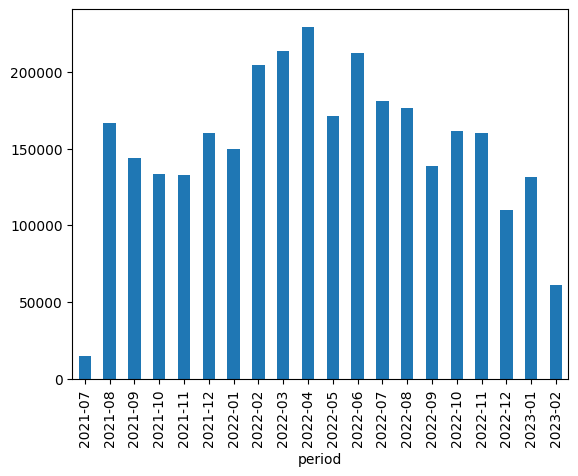

In [48]:
data.groupby('period')['Цена'].sum().plot.bar()